# IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

# DATASET CREATION

## Tomato images

In [3]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"C:\Users\DELL\OneDrive\Desktop\tomatoes"):
    for file in f:
        if'.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(img)
        result.append(encoder.transform([[1]]).toarray())

## Apples Images

In [4]:
paths=[]
for r,d,f in os.walk(r"C:\Users\DELL\OneDrive\Desktop\apples"):
    for file in f:
        if'.jpg' in file or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())

In [5]:
data=np.array(data)
data.shape

(290, 128, 128, 3)

In [6]:
result=np.array(result)
result=result.reshape(290,2)

## visualization

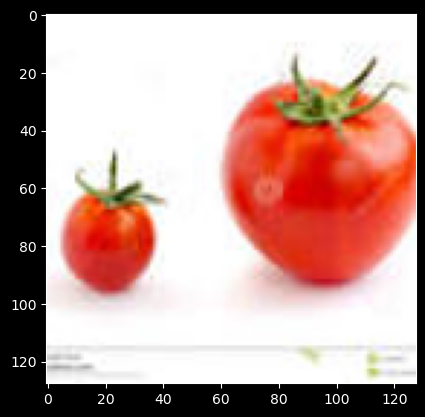

In [7]:
plt.imshow(data[0])

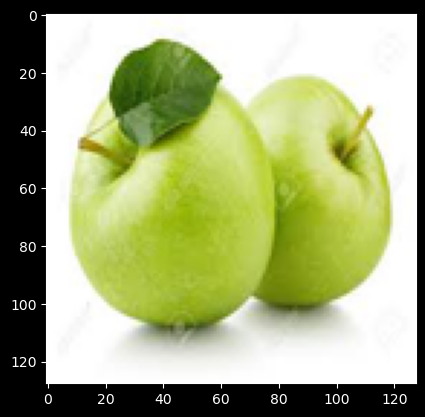

In [8]:
plt.imshow(data[230])

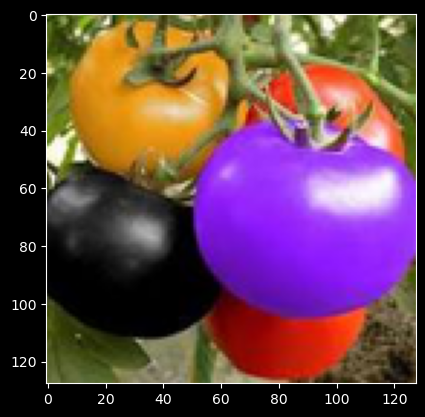

In [18]:
plt.imshow(data[90])

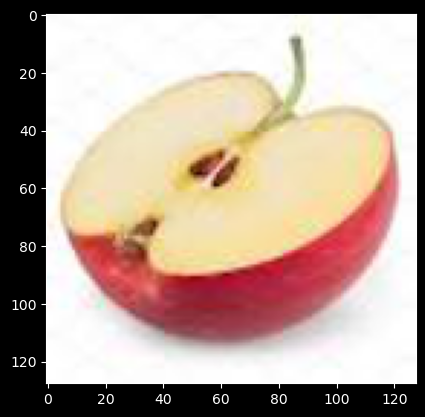

In [10]:
plt.imshow(data[150])

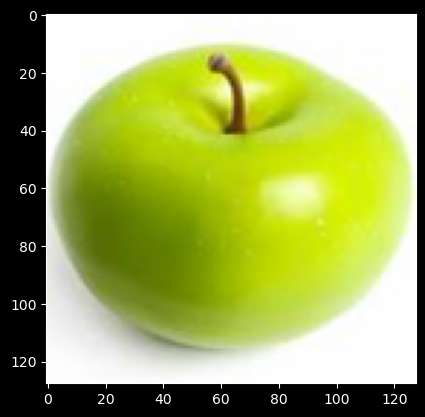

In [20]:
plt.imshow(data[199])

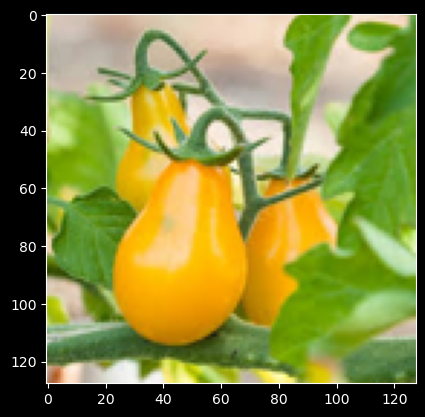

In [19]:
plt.imshow(data[110])

## Data Splitting

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

## Model creation using sequential method(cnn model)

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


## Model configuration

In [23]:
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [24]:
x_train.shape

(232, 128, 128, 3)

In [25]:
y_train.shape

(232, 2)

## Model training

In [29]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5474 - loss: 6.4561 - val_accuracy: 0.4138 - val_loss: 9.0876
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6078 - loss: 1.5109 - val_accuracy: 0.6552 - val_loss: 0.6189
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6897 - loss: 0.6205 - val_accuracy: 0.6552 - val_loss: 0.6311
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7198 - loss: 0.5821 - val_accuracy: 0.6379 - val_loss: 0.6157
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7586 - loss: 0.5389 - val_accuracy: 0.6724 - val_loss: 0.6181
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7241 - loss: 0.5478 - val_accuracy: 0.5862 - val_loss: 0.6160
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7716 - loss: 0.4991 - val_accuracy: 0.6552 - val_loss: 0.6202
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7414 - loss: 0.4790 - val_accuracy: 0.6724 - val_loss: 0.6021
Epoch 9/20
4/4 ━

## Model evaluation

In [30]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\nTest accuracy:%.1f%%" % (100.0*score[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6724 - loss: 0.5891

Test accuracy:67.2%
